In [1]:
import pandas as pd
import numpy as np
import re
import nltk.corpus
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from nltk.stem import PorterStemmer 
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.model_selection import StratifiedShuffleSplit
import nltk
#nltk.download()
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import random
from wordcloud import WordCloud
from sklearn.decomposition import NMF

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alubis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alubis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Exploiting text comes down to extracting specific information from large text files and text files and processing them. Finding patterns is done by creating ranking, clustering, summarizing, and linking searches. The purpose of this notebook is to analyze book reviews of various genres and to identify among them possible factors that influenced whether the reviewer's opinion was positive or negative. This will allow us to create a profile of the consumer, which will make it easier to understand their interests and preferences.

Data
The data needed for the study came from goodreads.com and steamboatbooks.com. The collected database contains 51,000 reviews on 363 different books. Among them are 20 genres (thriller, science-fiction, etc.). We also have knowledge about the average rating given by reviewers, the number of pages of the book and some additional features available on the website.

Theses reviews were scraped by us from goodreads.com. The first step was to evaluate whether the review was positive or negative. For this, the TextBlob library was used.

In [2]:
#dane = pd.read_excel('dane.xlsx')
#opinie=[]
#for item in dane.recenzja:
#    analysis = TextBlob(item, analyzer=NaiveBayesAnalyzer())
#    opinie.append(analysis.sentiment.classification)
#opinie
#dane['opinia'] = opinie
#dane.to_excel('dane.xlsx', index = False)

In [3]:
dane = pd.read_excel('dane.xlsx')

In [4]:
wektor = dane["recenzja"]

1. Cleaning.
For more detailed text analysis, the data will be cleared using regular expressions/

In [5]:
url_patterns = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
html_patterns = r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
n_patterns = r'\n'

wektor=[re.sub(url_patterns, '', el) for el in wektor]
wektor=[re.sub(html_patterns, '', el) for el in wektor]
wektor=[re.sub(n_patterns, '', el) for el in wektor]
wektor=[re.sub('[^a-zA-Z0-9 \n\.]', '', el) for el in wektor]
# unnecessary spaces
wektor=[re.sub(' +', ' ', el) for el in wektor]
wektor=[re.sub('[.]', '', el) for el in wektor]
wektor=[el.lower() for el in wektor]

In [6]:
def find_count(word: str, pattern: str) -> int:
    return len(re.findall(pattern, word.lower()))
a = dane['recenzja'].apply(find_count, pattern='book').mean()
b = dane['recenzja'].apply(find_count, pattern='book').max()
print('Mean: ', a, 'Max: ', b)

Mean:  3.171490196078431 Max:  58


The word 'book' appears on average 3 times in each review. In extreme cases, even 58. As this term does not make any sense at any stage of the analysis, we will also eliminate it.

In [7]:
# book and books 
wektor=[re.sub('book', '', el) for el in wektor]
wektor=[re.sub('books', '', el) for el in wektor]
dane['wektor'] = wektor

In [8]:
a = dane.groupby('rodzaj')['rodzaj'].count().rename("N")
c = dane.groupby('opinia')['opinia'].count().rename("N")

In [9]:
my_list=['difficult', 'nice', 'interesting', 'boring']
for word in my_list:
    def count_words(opinia):
        list_words = re.findall(word,opinia)
        if list_words:
            return 1
        return 0
    dane[str(word)] = dane['wektor'].apply(count_words)
    b = dane.groupby('rodzaj')[str(word)].sum()
    frames = [a,b]
    a = pd.concat(frames, axis=1)
    a[str(word)]=a[str(word)]/a['N']*100
    d = dane.groupby('opinia')[str(word)].sum()
    frames2 = [c,d]
    c = pd.concat(frames2, axis=1)
    c[str(word)]=c[str(word)]/c['N']*100

In [10]:
a.sort_values(by=['interesting'], ascending=False)

,N,difficult,nice,interesting,boring
rodzaj,,,,,
science_technology,1650,4.909091,3.212121,24.606061,2.060606
science_fiction,3000,3.800000,5.100000,18.900000,4.233333
biography,3000,6.633333,3.000000,18.233333,1.966667
cookbooks,450,2.666667,3.111111,14.444444,0.888889
fantasy,2850,5.438596,6.280702,14.105263,3.087719
thriller,3450,4.608696,4.869565,13.913043,2.782609
horror,2700,3.444444,6.074074,13.259259,2.851852
debut_author,1050,4.857143,6.380952,13.238095,5.238095
nonfiction,2400,5.416667,3.291667,12.666667,1.708333


In [11]:
c.sort_values(by=['interesting'], ascending=False)

,N,difficult,nice,interesting,boring
opinia,,,,,
pos,46375,5.375741,4.718059,12.045283,2.074394
neg,4625,0.605405,1.902703,6.486486,5.037838


2. English stopwords
Some of the words can not be useful or bring any valuable information in text analysis, but they will occur frequently. In this step, we will get rid of such words by using stop words from the English language.

In [12]:
wektor = dane["wektor"][dane["rodzaj"]=='poetry']

In [13]:
one_text= ' '.join(wektor)
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(one_text) 

filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

3. Stemming 
We want to reduce inflectional forms and derivationally related forms of a word to a common base form, so we will use stemming and lemmatization.

In [14]:
ps = PorterStemmer()  
words = word_tokenize(one_text) 

In [15]:
wordlist = one_text.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

#print("List\n" + str(wordlist) + "\n")
#print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
wektor=dane["wektor"]
wektor=[re.sub('dont', '', el) for el in wektor]
wektor=[re.sub('didnt', '', el) for el in wektor]
wektor=[re.sub('read', '', el) for el in wektor]
wektor=[re.sub('story', '', el) for el in wektor]
wektor=[re.sub('like', '', el) for el in wektor]
dane["wektor"]=wektor

Now we can accurately compare what words occur most frequently in reviews by book type.

In [17]:
# split into train and test subsets
split = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=123)
for train_index, test_index in split.split(dane,dane["opinia"]): 
    strat_train = dane.reindex(train_index)
    strat_test = dane.reindex(test_index)

In [18]:
# prepare data for the model
X_train = strat_train
y_train = strat_train["opinia"]
X_test = strat_test
y_test = strat_test["opinia"]

In [19]:
len(X_train[X_train['opinia']=='pos'])

32463

Topic modeling
Another thing we can check is if we can determine the type of book based on the book review and if the results will be close to the actual genre of the book.

In [20]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+', stop_words = 'english')

# apply transformation
vec = vectorizer.fit_transform(X_train['wektor']).toarray()

# tf_feature_names tells us what word each column in the matric represents
feature_names = vectorizer.get_feature_names()

In [21]:
# let us assume 10 topics
number_of_topics = 10

# define the random state so that this model is reproducible
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [22]:
# take a look at the output
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

model.fit(vec)

LatentDirichletAllocation(random_state=0)

In [23]:
no_top_words = 10
display_topics(model, feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,characters,8598.7,people,4568.7,e,1789.8,que,5952.1,just,12691.3,family,4035.3,die,1322.9,life,3161.5,love,9893.5,life,2830.7
1,really,6516.8,hi,3124.6,di,1323.8,y,3685.7,im,8879.6,novel,3421.1,und,1069.1,family,2294.8,just,6929.6,memoir,1432.4
2,just,5613.0,war,2881.9,che,920.1,la,3340.5,love,7865.3,love,3186.4,words,1007.9,time,2138.6,really,6565.6,trump,1374.5
3,s,5250.8,women,2535.8,la,905.5,en,2641.1,really,7358.3,life,2962.8,stories,803.2,world,1998.8,loved,4760.5,did,1258.5
4,novel,4409.8,world,2266.3,non,721.0,el,1980.0,know,6455.8,time,2789.1,rose,761.1,school,1644.1,think,4499.9,time,1220.0
5,series,4385.5,life,1923.2,je,705.3,es,1743.6,s,5066.5,characters,2412.0,world,738.5,people,1510.9,im,4094.2,years,1196.8
6,good,4250.6,time,1611.6,si,684.9,una,1270.7,loved,4941.2,just,2058.1,der,708.1,human,1464.4,life,4056.1,man,1152.1
7,character,4097.1,men,1512.3,il,638.1,se,1237.8,characters,4901.5,woman,2001.5,magic,615.6,new,1369.0,s,4040.2,people,1078.4
8,time,3975.6,way,1444.7,o,613.1,lo,1117.1,series,4643.6,years,1783.4,girls,601.1,years,1326.6,way,3876.2,library,1014.3
9,plot,3636.7,american,1430.2,se,576.4,los,1100.8,going,4509.0,home,1740.6,children,565.3,parents,1310.1,ing,3764.5,ing,1005.0


1. Topic 0: characters, really, just, s, novel, series, character, time, plot
2. Topic 1: people, hi, war, women, world, life, time, men, way, american
3. Topic 2: e, di che, la, non, je si, il, o, se
4. Topic 3: que, y, la, en, el, es, una, se, lo, los
5. Topic 4: just, im, love, really, know, s, loved, characters, series, going
6. Topic 5: family, novel, love, life, time, characters, just, woman, years, home
7. Topic 6: die, und, words, stories, rose, world, der, magic, girls, childern
8. Topic 7: life, family, time, world, school, people, human, new, years, parents
9. Topic 8: love, just, really, loved, think, im, life, s, way, ing
10. Topic 9: life, memoir, trump, did, time, years, man, people, library, ing

Here we can see the most popular paternas that the algorithm lists based on the analysis of opinion content.

Topic modeling II

In [24]:
vec_2 = vectorizer.fit_transform(dane.wektor.astype('U'))
vec_2

<51000x14976 sparse matrix of type '<class 'numpy.int64'>'
	with 3579749 stored elements in Compressed Sparse Row format>

In [25]:
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(vec_2)

LatentDirichletAllocation(n_components=5, random_state=42)

In [26]:
for i in range(10):
    random_id = random.randint(0,len(vectorizer.get_feature_names()))
    print(vectorizer.get_feature_names()[random_id])

estar
appreciating
jumpin
copies
lector
cleverness
shrink
oxford
circling
hatred


In [27]:
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [28]:
# 10 words with highest probabilities for all the five topics
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['time', 'heart', 's', 'really', 'characters', 'know', 'im', 'loved', 'just', 'love']


Top 10 words for topic #1:
['novel', 'women', 'way', 'years', 'world', 'hi', 'family', 'time', 'people', 'life']


Top 10 words for topic #2:
['good', 'ing', 'love', 'novel', 'time', 's', 'really', 'series', 'just', 'characters']


Top 10 words for topic #3:
['una', 'o', 'se', 'es', 'el', 'e', 'en', 'y', 'la', 'que']


Top 10 words for topic #4:
['way', 's', 'know', 'love', 'good', 'people', 'think', 'im', 'really', 'just']




1. Topic 0: 'time', 'heart', 's', 'really', 'characters', 'know', 'im', 'loved', 'just', 'love'
2. Topic 1: 'novel', 'women', 'way', 'years', 'world', 'hi', 'family', 'time', 'people', 'life'
3. Topic 2: 'good', 'ing', 'love', 'novel', 'time', 's', 'really', 'series', 'just', 'characters'
4. Topic 3: 'una', 'o', 'se', 'es', 'el', 'e', 'en', 'y', 'la', 'que'
5. Topic 4: 'way', 's', 'know', 'love', 'good', 'people', 'think', 'im', 'really', 'just'

In [29]:
topic_values = LDA.transform(vec_2)
dane['Topic'] = topic_values.argmax(axis=1)

Topic modeling III

In [30]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(vec_2)

NMF(n_components=5, random_state=42)

In [31]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-5:]

In [32]:
topic_values = nmf.transform(vec_2)
dane['Topic_2'] = topic_values.argmax(axis=1)

We can compare the results obtained with the two methods

In [33]:
dane[['Topic', 'Topic_2']]

,Topic,Topic_2
0,1,1
1,1,1
2,1,1
3,1,1
4,4,1
...,...,...
50995,0,1
50996,0,1
50997,4,1
50998,0,1


In [34]:
cols = ['Topic', 'Topic_2']
dane['combined'] = dane[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [49]:
dane.groupby('combined')['combined'].count().rename("N")

combined
0_0      321
0_1     5570
0_2      112
0_3     1468
0_4       44
1_0        4
1_1    12931
1_2       20
1_3     1373
1_4        5
2_0        4
2_1    10053
2_2       62
2_3      999
2_4       16
3_0        1
3_1       82
3_2     1121
3_3        7
3_4        2
4_0       45
4_1    14021
4_2       15
4_3     1628
4_4       46
Name: N, dtype: int64

Most often for the opinion, for which in the first approach we determined the topic No. 0, the second method indicated the topic No. 1. The list of words with which the given topics are determined is very similar. Topic #1 overlaps with topic #1 in the case of the second approach. Topic #2 with topic #1 from the second approach. Topic #3 also overlaps most closely with topic #2 from the second approach. And topic #4 from the first approach is most similar to topics #1 and #3 from the second approach. In summary, both methods yielded a similar set of topics.

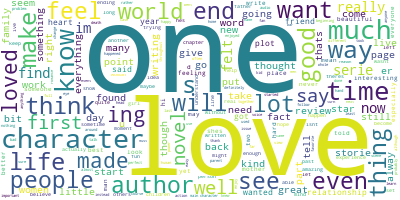

In [36]:
long_string = ','.join(list(dane.wektor.values))
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

Let's see how a book review looks depending on the subject of the book.

In [37]:
cnt = dane.groupby(['Topic','opinia'])['Topic'].count().rename("N")
cnt.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Topic  opinia
0      neg       12.630494
       pos       87.369506
1      neg        1.709695
       pos       98.290305
2      neg        8.244704
       pos       91.755296
3      neg       24.698311
       pos       75.301689
4      neg       13.396027
       pos       86.603973
Name: N, dtype: float64

Topic 1 has the highest percentage of positive opinions. 98% of opinions for this theme are positive. It is a topic described by words: novel', 'women', 'way', 'years', 'world', 'hi', 'family', 'time', 'people', 'life'. We can therefore conclude that books relating to life themes or family books have a positive reaction.

There are many benefits to understanding the text. Understanding what factors determine whether a book review is positive or negative can be important information for both authors and book publishers. Based on the data collected, we know what type of book it is, the gender of the author, the publisher, or the number of pages. The content of the review allows you to find additional as well as valuable information. On the basis of sentiment analysis it is possible to determine whether the review is positive or negative and to find patterns which allow modelling the subject of the book.

In [38]:
dane = pd.get_dummies(dane, columns=['rodzaj', 'Topic', 'plec_recenzenta'], drop_first=True)

In [43]:
dane = dane.fillna(value=np.nan)
dane = dane.replace(to_replace='None', value=np.nan)
dane= dane.dropna(subset=['cena', 'liczba nagród', 'stars', 'rodzaj_best_of_the_best', 'rodzaj_biography',
       'rodzaj_childrens', 'rodzaj_cookbooks', 'rodzaj_debut_author',
       'rodzaj_fantasy', 'rodzaj_fiction', 'rodzaj_historical_fiction',
       'rodzaj_horror', 'rodzaj_humor', 'rodzaj_nonfiction', 'rodzaj_novels',
       'rodzaj_picture_books', 'rodzaj_poetry', 'rodzaj_romance',
       'rodzaj_science_fiction', 'rodzaj_science_technology',
       'rodzaj_thriller', 'rodzaj_young_adult_fiction', 'Topic_1', 'Topic_2',
       'Topic_3', 'Topic_4', 'plec_recenzenta_male'])
dane = dane.reset_index()

In [44]:
dane.head()

,index,Unnamed: 0,ASIN,autor,bohaterzy,cena,format,główny bohater,główny_bohater,kraj,...,rodzaj_romance,rodzaj_science_fiction,rodzaj_science_technology,rodzaj_thriller,rodzaj_young_adult_fiction,Topic_1,Topic_2,Topic_3,Topic_4,plec_recenzenta_male
0,0,0,0399590501,Tara Westover,NaN,28.0,Hardcover,NaN,NaN,United States,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0399590501,Tara Westover,NaN,28.0,Hardcover,NaN,NaN,United States,...,0,0,0,0,0,1,0,0,0,0
2,2,2,0399590501,Tara Westover,NaN,28.0,Hardcover,NaN,NaN,United States,...,0,0,0,0,0,1,0,0,0,0
3,3,3,0399590501,Tara Westover,NaN,28.0,Hardcover,NaN,NaN,United States,...,0,0,0,0,0,1,0,0,0,0
4,4,4,0399590501,Tara Westover,NaN,28.0,Hardcover,NaN,NaN,United States,...,0,0,0,0,0,0,0,0,1,0


In [45]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=123)
for train_index, test_index in split.split(dane,dane["opinia"]): 
    strat_train = dane.reindex(train_index)
    strat_test = dane.reindex(test_index)

In [46]:
X_train = strat_train[['cena', 'liczba nagród', 'stars', 'rodzaj_best_of_the_best', 'rodzaj_biography',
       'rodzaj_childrens', 'rodzaj_cookbooks', 'rodzaj_debut_author',
       'rodzaj_fantasy', 'rodzaj_fiction', 'rodzaj_historical_fiction',
       'rodzaj_horror', 'rodzaj_humor', 'rodzaj_nonfiction', 'rodzaj_novels',
       'rodzaj_picture_books', 'rodzaj_poetry', 'rodzaj_romance',
       'rodzaj_science_fiction', 'rodzaj_science_technology',
       'rodzaj_thriller', 'rodzaj_young_adult_fiction', 'Topic_1', 'Topic_2',
       'Topic_3', 'Topic_4', 'plec_recenzenta_male']]
y_train = strat_train["opinia"]
X_test = strat_test[['cena', 'liczba nagród', 'stars', 'rodzaj_best_of_the_best', 'rodzaj_biography',
       'rodzaj_childrens', 'rodzaj_cookbooks', 'rodzaj_debut_author',
       'rodzaj_fantasy', 'rodzaj_fiction', 'rodzaj_historical_fiction',
       'rodzaj_horror', 'rodzaj_humor', 'rodzaj_nonfiction', 'rodzaj_novels',
       'rodzaj_picture_books', 'rodzaj_poetry', 'rodzaj_romance',
       'rodzaj_science_fiction', 'rodzaj_science_technology',
       'rodzaj_thriller', 'rodzaj_young_adult_fiction', 'Topic_1', 'Topic_2',
       'Topic_3', 'Topic_4', 'plec_recenzenta_male']]
y_test = strat_test["opinia"]

In [48]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
logReg.coef_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-0.00915808,  0.01199859,  0.37539723,  0.11470756,  0.09316148,
         0.28248141,  0.0560925 ,  0.21485986,  0.1337726 ,  0.20766684,
         0.45989894,  0.1837231 , -0.05923467,  0.00677524, -0.49044444,
        -0.33421661, -0.2440024 , -0.16615204,  0.09728832, -0.58670038,
         0.21035723,  0.01626575,  2.12273697,  0.1619917 ,  0.44265132,
        -0.82883638,  0.07073549,  0.0730169 ]])

SUMMARY
This notebook shows how much information can be extracted from a text. By having a small amount of information regarding the book itself, but having reviews of the book, we can conduct analyses that achieve a wide range of information. Based on sentiment analysis, we are able to determine whether a review is positive or negative. We can find the most common patterns, determine the theme of the content, determine the frequency of each phrase, and look for correlations that would determine what might have influenced a review to be positive or negative.